# Исследование объявлений рынка недвижимости 

Предоставленный датасет - данные сервиса Яндекс.Недвижимость, в котором хранятся объявления о продаже квартир в Санкт-Петербурге и его окрестностях за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Для этого нужно установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

В каждом объявлении о продаже объекта недвижимости есть два типа данных: первые вписаны пользователем/владельцем, а вторые установлены системой на основе картографических данных (расстояние до центра, аэропорта, парков и водоемов).

### Шаг 1. Общая информация

#### Импортируем библиотеку Pandas, в переменной data будет храниться датасет. Разделителем для данных укажем "\t". Выведем первые 5 строк.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd #импортируем библиотеки

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #новая переменная, чтение файла, разделитель
data.head() #первые 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Рассмотрим общую информацию о датафрейме

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в таблице 22 колонки, 23699 строк.
И очень много пропущенных значений, например, в колонке is_apartment из 23699 строк пропущено 20 924 (>88%).

Проанализируем типы данных каждой колонки. Если тип данных не соответствует, оставим квадратик без галочки.
- [x] total_images — число фотографий квартиры в объявлении - целое число.
- [x] last_price — цена на момент снятия с публикации - вещественное число.
- [x] total_area — общая площадь квартиры в квадратных метрах (м²) - вещественное число.
- [ ] first_day_exposition — дата публикации - объект.
- [x] rooms — число комнат - целое число.
- [x] ceiling_height — высота потолков (м) - вещественное число.
- [ ] floors_total — всего этажей в доме - вещественное число.
- [x] living_area — жилая площадь в квадратных метрах (м²) - вещественное число.
- [x] floor — этаж целое число.
- [X] is_apartment — апартаменты - объект (булев тип).
- [x] studio — квартира-студия - объект (булев тип).
- [x] open_plan — свободная планировка - объект (булев тип).
- [X] kitchen_area — площадь кухни в квадратных метрах (м²) - вещественное число.
- [ ] balcony — число балконов - вещественное число.
- [X] locality_name — название населённого пункта - объект.
- [X] airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - вещественное число.
- [X] cityCenters_nearest — расстояние до центра города (м) - вещественное число.
- [ ] parks_around3000 — число парков в радиусе 3 км - вещественное число.
- [X] parks_nearest — расстояние до ближайшего парка (м) - вещественное число.
- [ ] ponds_around3000 — число водоёмов в радиусе 3 км - вещественное число.
- [X] ponds_nearest — расстояние до ближайшего водоёма (м) - вещественное число.
- [ ] days_exposition — сколько дней было размещено объявление (от публикации до снятия) - вещественное число.


#### Построим общую гистограмму для всех числовых столбцов таблицы. 


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

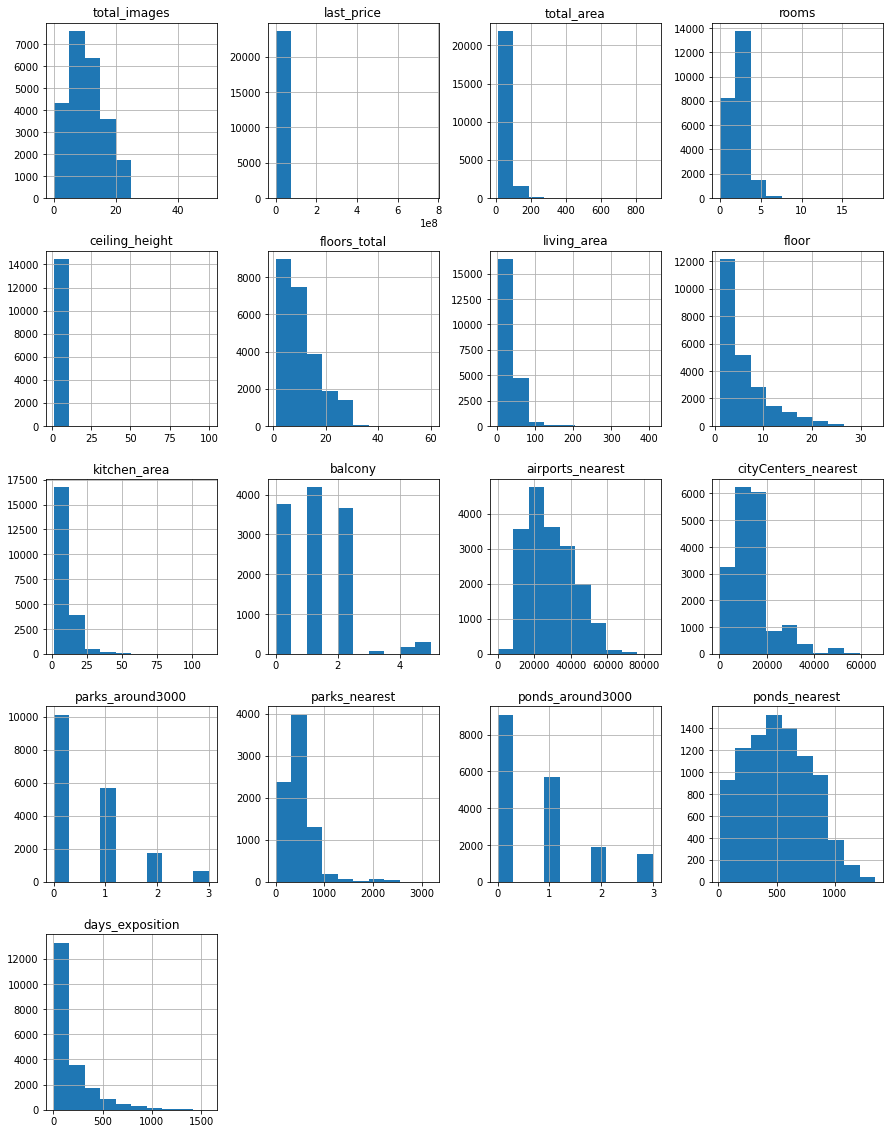

In [3]:
data.hist(figsize=(15, 20))

Гистограммы содержат много нулевых значений - так как в таблице много пропущенных значений. 
 - Самыми распространенными площадями квартир являются до 200 кв.метров.
 - С количеством комнат до 4
 - Высота потолков распределена от 1 до 100 - свидетельствует о выбросах
 - Высота дома до 60 - тоже нужно проверить на выбросы, самой распространенной высотой являются дома до 15 этажей
 - Жилая площадь распределена от 0 до 400
 - Самыми распространенными квартирами в объявления являются квартиры на 1-10 этажах
 - Площадь кухни до 24 квадратных метров - самая распространенная
 - Большее кол-во квартир с 0-2 балкона
 - Среднее расстояние до аэропорта - 20 км
 - До центра города - в большинстве менее 20 км
 - Много нулевых значений в столбце "parks_around3000" и "ponds_around3000"
 - В среднем до ближайшего парка 500 м
 - До ближайшего водоема 500 м
 - Обявления в среднем были размещены около 100 дней.

#### Промежуточный вывод: 
Полученная таблица содержит 22 колонки, 23699 строк. Также в датафрейме достаточно много пропущенных значений. Некоторые типы данных не соответствуют содержимому столбцов. Общие гистограммы на первый взгляд реалистичны.

### Шаг 2. Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах. 
##### Для начала определим, в каких столбцах есть пропуски.

In [4]:
 data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим на долю пропусков: чем теплее цвет ячейки таблицы - тем доля пропусков в столбце больше.

Самые "теплые" значения получились у столбцов "is_apartment", "parks_nearest", "ponds_nearest".

In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


##### Заполним пропущенные значения там, где это возможно. 

Рассмотрим столбец "is_apartment". Скорее всего продавец оставлял это поле пустым в том случае, если квартира не является апартаментами. Поэтому можно заменить все пропуски на "False".

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заменяем пропущенные значения

Рассмотрим столбец "balcony". Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [7]:
data['balcony'] = data['balcony'].fillna(0) #заменяем значения

Столбец "kitchen_area". Заменим пропуски медианным значением площади кухни квартир, с таким же количество комнат.

In [8]:
for z in data['rooms'].unique(): #перебираем уникальное значение количества комнат
    #отбираем строки, где в площади кухни есть пропуски и количество комнат совпадает
    data.loc[(data['rooms'] == z) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == z), 'kitchen_area'].median() #записываем в них медиану площади кухни с таким же количеством комнат

pd.set_option('mode.chained_assignment', None)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Теперь в kitchen_area 23502 заполненных значения.
Так же сделаем и для столбца "living_area"

In [9]:
for z in data['rooms'].unique(): #перебираем уникальное значение количества комнат
    #отбираем строки, где в жилой есть пропуски и количество комнат совпадает
    data.loc[(data['rooms'] == z) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == z), 'living_area'].median() #записываем в них медиану жилой площади с таким же количеством комнат

Еще раз рассмотрим, в каких столбцах остались пропуски:

Самые большие пропуски в столбцах "parks_nearest" и "ponds_nearest"

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски в столбцах "parks_around3000" и "ponds_around3000" на нули. Скорее всего, если парков и водоемов нет в радиусе 3 км - оставляли пропуски.

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Посмотрим на столбец "airports_nearest". Медиана - 26726 км, среднее - 28793 км. Заменим пропуски медианным значением и посмотрим, насколько изменится среднее и медиана. 

In [12]:
data['airports_nearest'] = data['airports_nearest'].fillna(26726)
data['airports_nearest'].describe()

count    23699.000000
mean     28310.148023
std      11090.330161
min          0.000000
25%      21183.000000
50%      26726.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Медиана и среднее изменились совсем немного, поэтому эту замену оставляем.

Что касается других столбцов с пропусками:

    - "ceiling_height" - пропуски будут обработаны в разделе "дубликаты и необычные значения" после обработки аномалий и нахождения медианы
    - "kitchen_area" - осталось 197 пропусков, значит нужно подробнее рассматривать столбцы "rooms", "living_area"
    - "locality_name" - прпоуски в названиях населенного пункта невозможно заменить на что-то "среднее" или "медианное", поэтому пока оставим как есть. Но 49 пропусков значительно не повлияют на выборку.
    
    
    - "cityCenters_nearest", "parks_nearest", "ponds_nearest" - значения в столбцах зависят от географического расположения квартиры, значения представлены в метрах - использовать среднее или медианное значения для заполнения пропусков будет неправильным
    - 'days_exposition' - так же не представляется возможным заменить пропуски на среднее или медиану, так как это крайне индивидуальное значение для каждой квартиры

    Причины, по которым могли возникнуть пропуски: 
1. продавец пропустил заполнение ячейки, так как значение равно нулю. Например, в квартире нет балконов - ячейку пропускают.
2. продавец не знает такую информацию о своей квартире, например, высоту потолков
3. в столбцах "parks_around3000" и "ponds_around3000" одинаковое количество пропущенных значений - 5518. Можно подозревать технический сбой, так как эти данные заполняет не продавец.
4. Возможно, пропущенное значение в "days_exposition" - означает, что объявление все еще находится на сайте и не закрыто.

#### Типы данных

##### Преобразуем типы данных некоторых столбцов.
Это нужно сделать для дальнейших вычислений и анализа. 
Поменяем тип данных для колонки "first_day_exposition" на datetime

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Поменяем тип данных в столбце "balcony" - число балконов может быть только целым числом.

In [14]:
data['balcony'] = data['balcony'].astype('Int64')

Заменим тип данных в "parks_around3000" и "ponds_around3000" на целое число. Число парков и водоемов может быть только целым числом.

In [15]:
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')

Также заменим тип данных в столбце с количеством этажей в доме.

In [16]:
data['floors_total'] = data['floors_total'].astype('Int64')

#### Дубликаты и необычные значения

Посмотрим на явные дубликаты в таблице data.

In [17]:
data.duplicated().sum()

0

Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. 

In [18]:
data['locality_name'].sort_values().unique() 
#посмотрим все отсортированные по алфавиту уникальные значения названий населенных пунктов

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Заменим букву "ё" на букву "е", "поселок городского типа", "городской поселок" и т.д. на пропуск.

In [19]:
data['locality_name'] = data['locality_name'].str.lower() #приводим к нижнему регистру
data['locality_name'] = data['locality_name'].str.replace('ё', "е") #заменяем букву "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('поселок ', "")
data['locality_name'] = data['locality_name'].str.replace('городской ', "")
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', "")
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', "")
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', "")
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', "")
data['locality_name'] = data['locality_name'].str.replace('городского типа ', "")
data['locality_name'] = data['locality_name'].str.replace('деревня ', "")
data['locality_name'] = data['locality_name'].str.replace('село ', "")
data['locality_name'] = data['locality_name'].str.replace('жилгородок', "жил")
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', "")
data['locality_name'] = data['locality_name'].str.replace('станции ', "")

In [20]:
len(data['locality_name'].sort_values().unique()) # посмотрим, сколько уникальных значений в столбце теперь

306

Теперь уникальных значений всего 306.

Посмотрим снова все уникальные значения столбца

In [21]:
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жил', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара', 'ильи

Поработаем с другими столбцами.

Столбец 'total_area': посмотрим на графике, есть ли выбивающиеся значения.

Гистограмма похожа на распределение Пуассона. Посмотрим поближе значение, крайне отличающееся от остальных.

<AxesSubplot:>

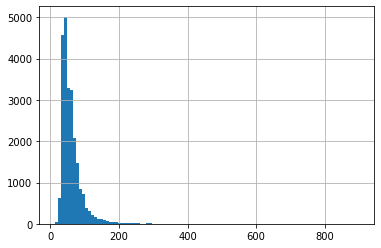

In [22]:
data['total_area'].hist(bins=100) # гистограмма

<AxesSubplot:>

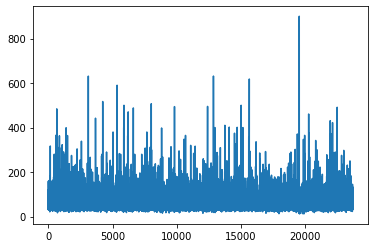

In [23]:
data['total_area'].plot() #график

[Text(0.5, 1.0, 'Диаграмма размаха общей площади')]

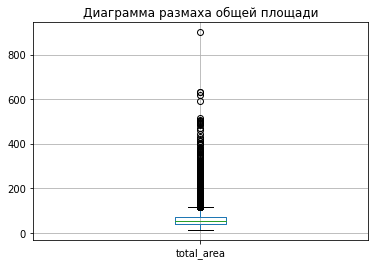

In [24]:
data.boxplot(column = 'total_area').set(    #строим диаграмму размаха
title= 'Диаграмма размаха общей площади')
#plt.ylim(0.1, 20)

In [25]:
data[data['total_area'] > 600] # посмотрим квартиры с площадью больше 600

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5,145.0,5,False,...,60.0,0,санкт-петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
12859,20,140000000.0,631.2,2019-04-09,7,3.9,4,322.3,4,False,...,19.5,1,санкт-петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.4,7,258.0,5,False,...,70.0,0,санкт-петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


У всех квартир больше количество комнат, значит такая большая площадь total_area не удивительна.

Посмотрим на столбец rooms. Также, отдельно посмотрим на слишком отличающиеся значения.

<AxesSubplot:>

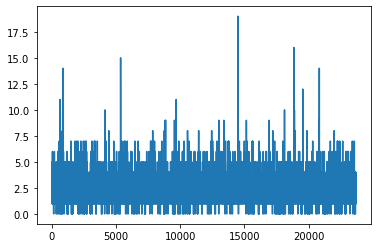

In [26]:
data['rooms'].plot() #график

In [27]:
data[data['rooms'] > 10] #число строк, с комнатами больше 10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,13.3,0,санкт-петербург,23606.0,3148.0,0,NaN,0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,16.6,0,санкт-петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,санкт-петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,11.9,0,санкт-петербург,21469.0,1015.0,1,686.0,2,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,False,...,27.6,0,санкт-петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,13.0,1,санкт-петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4,168.3,2,False,...,25.9,0,санкт-петербург,21104.0,2054.0,3,541.0,2,118.0,95.0


Посмотрим на диаграмму размаха.

(0.1, 20.0)

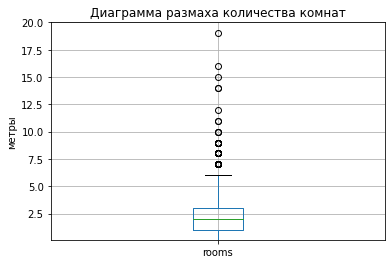

In [28]:
data.boxplot(column = 'rooms').set(    #строим диаграмму размаха
title= 'Диаграмма размаха количества комнат', ylabel='метры')
plt.ylim(0.1, 20)

    19 комнат - очень странно. Удалим строки, где количество комнат больше 14.

In [29]:
data = data.loc[data['rooms']<14]

Посмотрим на столбец ceiling_height. 

В некоторых квартирах потолки выше 20 метров - это очень много даже для Санкт-Петербурга.
Построим диаграмму размаха для высоты потолка.


<AxesSubplot:>

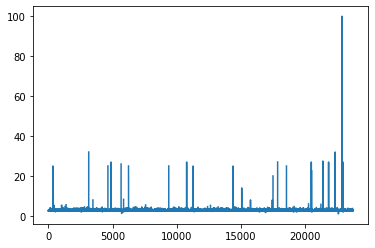

In [30]:
data['ceiling_height'].plot() # строим график

(1.2, 6.0)

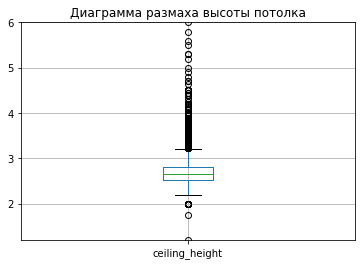

In [31]:
data.boxplot(column = 'ceiling_height').set(    #строим диаграмму размаха
title= 'Диаграмма размаха высоты потолка')
plt.ylim(1.2, 6)

По результатам диаграммы получилось, что есть несколько значений ниже 2 метров - однозначно выбросы, таких квартир не может быть. И большое количество квартир с высотой потолка от 3,2. 

In [32]:
data['ceiling_height'].describe()

count    14501.000000
mean         2.771406
std          1.261166
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Было принято решение разделить на 10 все значения высоты потолков, выше 20 метров. Так как 25 метров скорее всего равняется 2,5 метра.

In [33]:
def process_height(height): #функция, которой передается значение, и если оно больше 20 - делится на 10.
    if height > 20:
        return height / 10
    else: return height

data['ceiling_height'] = data['ceiling_height'].apply(process_height) # применяем функцию к столбцу с высотой потолка
data['ceiling_height'].describe()

count    14501.000000
mean         2.730748
std          0.350426
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

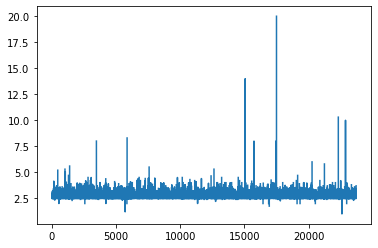

In [34]:
data['ceiling_height'].plot()

Удалим выбросы из таблицы. Удалим строки с высотой потолка более 6 метров.

In [35]:
data = data.loc[data['ceiling_height'] < 6] 

Удалим строки, где потолки меньше 2,3 метров.

In [36]:
data = data.loc[data['ceiling_height'] > 2.3]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,...,8.50,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0
13,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.0,5,False,...,5.20,1,петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,10.60,1,санкт-петербург,19424.0,4489.0,0,NaN,1,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,8.00,0,петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


<AxesSubplot:>

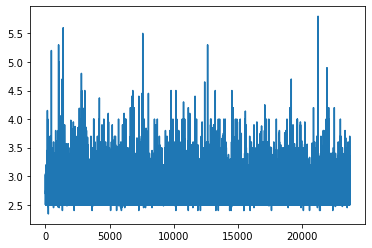

In [37]:
data['ceiling_height'].plot() #проверим на графике

Теперь заполним пропущенные значения в столбце "ceiling_height" медианным значением.

In [38]:
data['ceiling_height'].describe() # найдем значение медианы

count    14471.000000
mean         2.727117
std          0.276514
min          2.340000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

In [39]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.650000) # заполним пропуски медианой

Посмотрим на этажность дома и этаж квартиры.
Посчитаем, сколько квартир, расположенных на этаже выше, чем этажность дома.

In [40]:
(data['floor'] > data['floors_total']).sum()

0

Посчитаем, сколько квартир с количеством балконов больше, чем количество комнат.

In [41]:
(data['balcony'] > data['rooms']).sum()

1384

Заменим количество балконов в таких квартирах на количество комнат.

In [42]:
data['balcony'] = data['balcony'].where((data['balcony']-data['rooms']) < 0, data['rooms'])
(data['balcony'] > data['rooms']).sum()

0

Посмотрим на этажность домов, проверим столбец на выбросы

<AxesSubplot:>

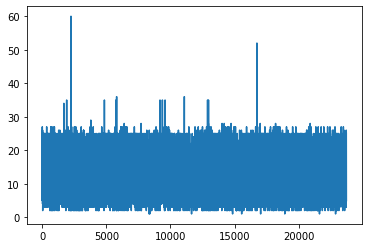

In [43]:
data['floors_total'].plot()

In [44]:
data[data['floors_total']>35] # посмотрим на квартиры, расположенные в домах, выше 35 этажей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,12.0,2,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,12.0,2,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.0,0,санкт-петербург,20728.0,12978.0,1,793.0,0,NaN,45.0


Есть 2 квартиры с этажностью дома больше 40. По данным https://spbhomes.ru/ самый высокий жилой дом в Ленинградской области - жилой комплекс «Князь Александр Невский» в 37 этажей. 

В соответствии с этим удаляем из датафрейма строки, где этажность дома выше 37.

In [45]:
data = data.loc[data['floors_total'] <= 37]

Посмотрим на квартиры-студии. В студиях не может быть больше 1 комнаты - поэтому квартира и считается студией.

In [46]:
((data['studio'] == 'True') & (data['rooms'] >1 )).sum()

0

Заменим значения для столбца "kitchen_area" на 0 для всех студий и для всех апартаментов.
А также сделаем жилую площадь для апартаментов равной нулю, так как апартаменты это коммерческая нежилая недвижимость.

In [47]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['is_apartment'] == True, 'kitchen_area'] = 0
data.loc[data['is_apartment'] == True, 'living_area'] = 0

pd.set_option('mode.chained_assignment', None)

Удалим строки с пропущенными значения в столбцах locality_name и kitchen_area. Доля этих строк крайне мала и не повлияет на выборку.

In [48]:
data = data.dropna(subset=['kitchen_area','locality_name']) 

#### Промежуточный вывод
В ходе предобработки данных были найдены и изучены пропущенные значения в таблице.

Некоторые данные удалось восстановить, тем самым не теряя количество строк, а следовательно ценную информацию. Например, количество балконов было заменено нулями, так как скорее всего при заполнении информации продавец пропускал ячейку, если балкона в квартире нет. Кроме того, пропущенная площадь кухни была заменена медианным значением площади кухни квартир, с таким же количеством комнат. Также было сделано и для жилой площади. 

Пропуски в столбцах "parks_around3000" и "ponds_around3000" в одинаковом количестве – предположительно, был технический сбой. 
В таблице были устранены дубликаты и необычные выделяющиеся значения. С помощью графиков и диаграмм размаха были найдены и устранены выбросы, например, количество балконов в некоторых квартирах превышало количество комнат, поэтому в таких строках количество балконов было заменено на количество комнат.

В таблице по прежнему есть пропуски: в столбцах cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition, citycenter_km. Это может повлиять на дальнейший анализ.


### Новые столбцы

Добавим в таблицу новый столбец "цена одного квадратного метра" - meter_price.
Затем посмотрим, есть ли выбивающиеся значения и удалим их.

In [49]:
data['meter_price'] = data['last_price'] / data ['total_area'] # для этого разделим стоимость квартиры на ее площадь
data['meter_price'].describe()

count    1.443600e+04
mean     1.015738e+05
std      5.030589e+04
min      1.118349e+02
25%      7.844405e+04
50%      9.670649e+04
75%      1.165084e+05
max      1.736842e+06
Name: meter_price, dtype: float64

Стандартное отклонение = 5.0306. Это свидетельствует о том, что есть очень выбивающиеся значения. Посмотрим диаграмму размаха.

[Text(0.5, 1.0, 'Диаграмма размаха цены квадратного метра')]

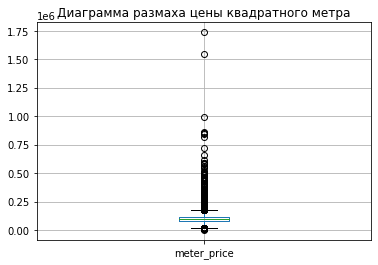

In [50]:
data.boxplot(column = 'meter_price').set(    #строим диаграмму размаха
title= 'Диаграмма размаха цены квадратного метра')

In [51]:
print(data['meter_price'].min()) # минимум
print(data['meter_price'].max()) # максимум
print(data['meter_price'].mean()) # среднее
print(data['meter_price'].median()) # медиана

111.8348623853211
1736842.105263158
101573.79978552347
96706.48706132577


Удалим строки, где цена за квадратный метр больше 280 тысяч рублей.

In [52]:
data = data.loc[data['meter_price'] < 280000]

Добавим столбец "день недели" - publication_day_week.
- 0 - понедельник 
- 1 - вторник 
- 2 - среда
- 3 - четверг
- 4 - пятница
- 5 - суббота
- 6 - воскресенье

In [53]:
data['publication_day_week'] = data['first_day_exposition'].dt.weekday

Добавим столбец publication_month - месяц публикации.

Добавим столбец publication_year - год публикации. 

In [54]:
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

Добавим 3 типа этажа квартиры:
- "первый"
- "последний"
- "другой"

In [55]:
def categorize_floors(row): # функция, принимающая строку, и категоризирующая значение столбцов по категориям
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else: return 'другой'
    except: pass


data['categorize_floor'] = data.apply(lambda row: categorize_floors(row), axis=1) #создадим новый столбец с категориями

Добавим новый столбец с расстоянием до центра города в километрах - 'citycenter_km'

In [56]:
data['citycenter_km'] = (data['cityCenters_nearest']/1000).round(3) # чтобы перевести метры в километры, надо разделить на 1000

## Шаг 3. Исследовательский анализ данных

#### Изучим отдельные параметры

Изучим следующие столбцы:
 - общая площадь
 - жилая площадь
 - площадь кухни
 - цена объекта
 - количество комнат
 - высота потолков
 - этаж квартиры
 - типа этажа квартиры
 - общее кол-во этажей в доме
 - расстояние до центра города в метрах
 - расстояние до ближайшего аэропорта
 - расстояние до ближайшего парка
 - день и месяц публикации объявления.
 


<AxesSubplot:>

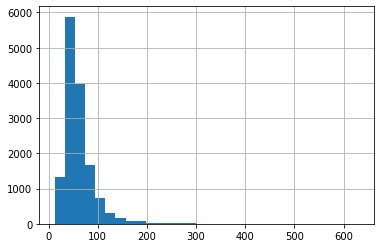

In [57]:
data['total_area'].hist(bins = 30) # гистограмма для общей площади

Распределение похоже на распределение Пуассона, что говорит о нормальности данных. Большинство квартир состоит в отрезке от 30 до 100 квадратных метров - это самые популярные квартиры. Менее популярны квартиры с площадью более 100 - такие квартиры считают дорогим сегментом, поэтому на рынке их не так много.

<AxesSubplot:>

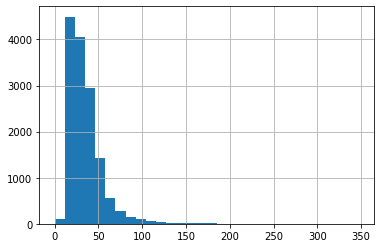

In [58]:
data['living_area'].hist(bins = 30) # построим гистограмму для жилой площади

Некоторые значения равны нулю - это апартаменты, где нет жилой площади. Самая распространенная жилая плошадь - до 50 кв.метров. Квартиры с площадью 0 - апартаменты. Квартир, с площадью более 55 кв.метров гораздо меньше на рынке - как и квартир с большей общей площадью.
Распределение диаграммы схоже с распределением Пуассона.

<AxesSubplot:>

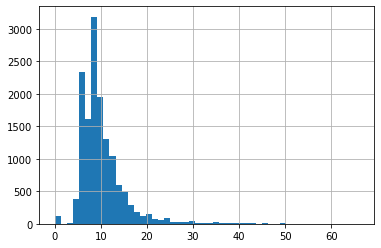

In [59]:
data['kitchen_area'].hist(bins = 50)

Так же, как и с жилой площадью - нулевые значения относятся к студиям и апартаментам. Больше всего на рынке квартир с кухней от 5 до 10 кв.метров. Далее, чем больше кухня в квартире - тем меньше таких квартир в продаже - аналогично с общей и жилой площадью.
Диаграмма так же похожа на распределение Пуассона.

<AxesSubplot:>

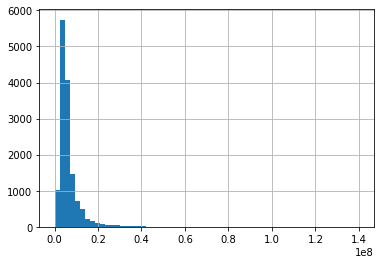

In [60]:
data['last_price'].hist(bins = 60)

In [61]:
data['last_price'].describe()

count    1.430800e+04
mean     6.255407e+06
std      5.462729e+06
min      1.219000e+04
25%      3.550000e+06
50%      4.800000e+06
75%      6.990000e+06
max      1.400000e+08
Name: last_price, dtype: float64

Самые распространенные объявления - квартиры со стоимостью 4,8 миллиона (медиана), менее всего квартир со стоимостью от 6,9 миллионов. 
Распределение схоже с распределением Пуассона. 

<AxesSubplot:>

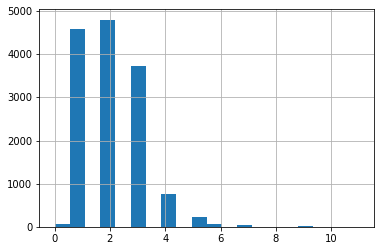

In [62]:
data['rooms'].hist(bins = 20)

Больше всего квартир с двумя комнатами, а также с одной. Квартиры без комнат - апартаменты.

<AxesSubplot:>

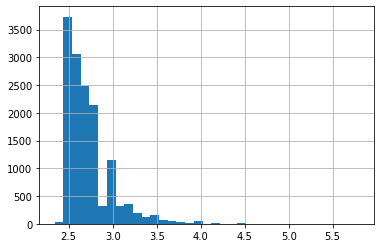

In [63]:
data['ceiling_height'].hist(bins = 35)

Самая популярная высота потолка в объявлениях - до 3 метров. Чем выше потолок, тем меньше квартир.
В диаграмме по высоте потолка есть провал в значениях между 2,8 метра и 3 метра. 

<AxesSubplot:>

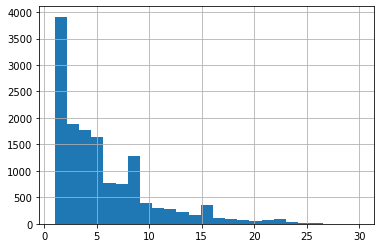

In [64]:
data['floor'].hist(bins = 25)

Больше всего квартир продавали на 2 этаже. Нулевых значений нет - нулевых этажей не бывает. Чем выше этаж квартиры, тем объявлений меньше.

<AxesSubplot:>

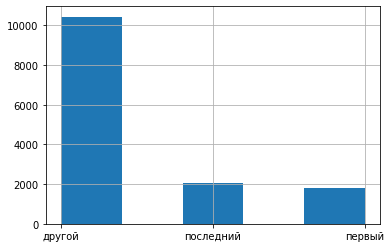

In [65]:
data['categorize_floor'].hist(bins = 5)

Как и ожидалось, большинство квартир расположены не на первом и не на последнем этажах. Квартиры на последних этажах продавали чуть чаще, чем на первом.

<AxesSubplot:>

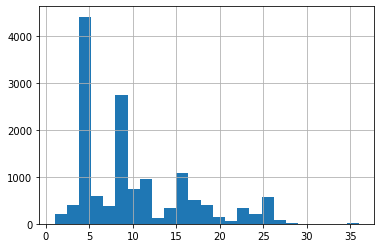

In [66]:
data['floors_total'].hist(bins = 25)

Большее количество квартир продают в 5-этажных домах и 9-этажных домах. Это неудивительно, ведь 5- и 9-этажные дома самые распространенные в РФ. 

<AxesSubplot:>

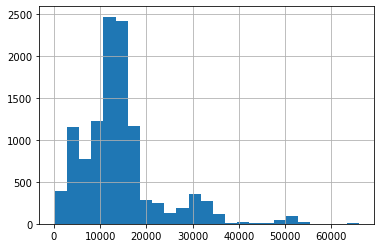

In [67]:
data['cityCenters_nearest'].hist(bins = 25)

В основном от центра города до продаваемой квартиры расстояние более 10 км. Небольшое количество квартир расположены прямо в центре, и достаточно много удалено от центра на расстояние более 20 км - скорее всего, это мелкие населенные пункты в области.

<AxesSubplot:>

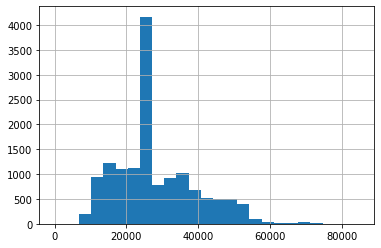

In [68]:
data['airports_nearest'].hist(bins = 25)

В этом столбце много пропущенных значений, но в среднем расстояние до ближайшего аэропорта 20 км.

<AxesSubplot:>

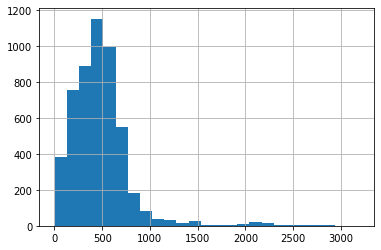

In [69]:
data['parks_nearest'].hist(bins = 25)

Распределение схоже с распределением Пуассона. Расстояние до ближайшего парка в среднем 500 метров.

<AxesSubplot:>

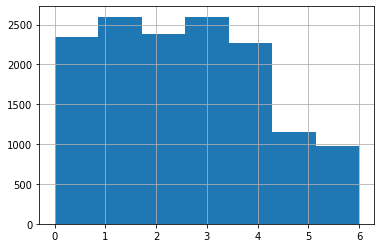

In [70]:
data['publication_day_week'].hist(bins = 7)

Большинство объявлений публиковалось в рабочие дни. В выходные дни число заметно уменьшается.

<AxesSubplot:>

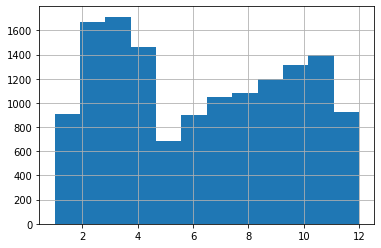

In [71]:
data['publication_month'].hist(bins = 12)

Большинство объявление публиковалось с февраля по апрель. Затем был спад и постепенный подьем до ноября. Затем снова провал. Наименьшее кол-во объявление было в мае.

#### Изучим, насколько быстро продавались квартиры

Построим гистограмму для столбца "days_exposition". Затем посчитаем среднее и медиану.

count    11899.000000
mean       189.650139
std        228.151048
min          1.000000
25%         45.000000
50%        103.000000
75%        246.000000
max       1580.000000
Name: days_exposition, dtype: float64


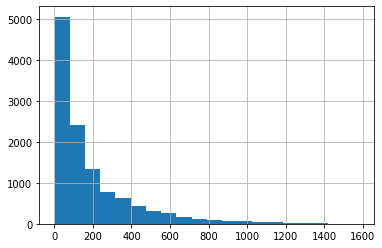

In [72]:
data['days_exposition'].hist(bins = 20)
print(data['days_exposition'].describe())

Большинство объявлений было размещено до 100 дней. Также есть объявления, где продажа занимала менее месяца.
По результатам диаграммы быстрой продажей можно считать объявления, срок размещения которых был менее 100 дней. Долгой продажей можно считать объявления со сроком от 200 дней. Крайне и необычно долгими - со сроком в 800 и более дней.

#### Изучение зависимости цены от других параметров

Изучим, зависит ли цена от:
 - общей площади
 - жилой площади
 - площади кухни
 - количества комнат
 - этажа
 - даты размещения

<AxesSubplot:xlabel='общая площадь', ylabel='цена'>

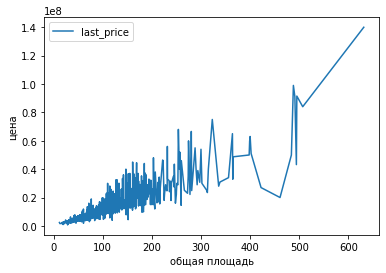

In [73]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(xlabel='общая площадь', ylabel='цена')

По графику наблюдается тенденция, можно сделать вывод: чем больше площадь, тем больше цена. Это логично и неудивительно. 

Посмотрим на коэффициент корреляции между двумя параметрами.

In [74]:
data['last_price'].corr(data['total_area'])

0.8407059287505608

Коэффициент корреляции Пирсона положительный и его значение близко к единице. Таким образом, можно с уверенностью сказать о зависимости этих двух параметров.

Посмотрим на зависимость цены и жилой площади.

<AxesSubplot:xlabel='жилая площадь', ylabel='цена'>

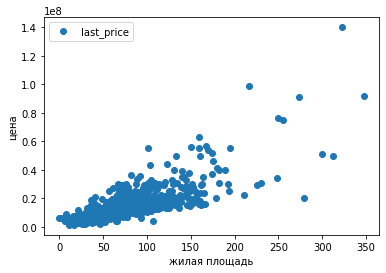

In [75]:
data.pivot_table(index='living_area', values = 'last_price', aggfunc='median').plot(ylabel='цена', xlabel='жилая площадь', style='o')

На диаграмме есть несколько разбросанных значений, выбивающихся из общей тенденции. Однако и по этой диаграмме можно сделать вывод о зависимости параметров.

Посмотрим на коэффициент Пирсона.

In [76]:
data['last_price'].corr(data['living_area'])

0.719722388964409

Значение так же показывает о высокой зависимости между параметрами.

Посмотрим на площадь кухни.

<AxesSubplot:xlabel='площадь кухни', ylabel='цена'>

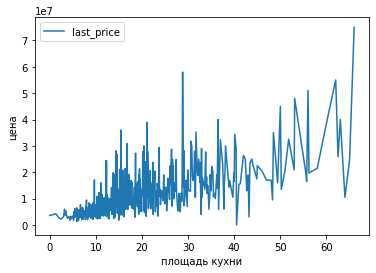

In [77]:
data.pivot_table(index='kitchen_area', values = 'last_price', aggfunc='median').plot(ylabel='цена', xlabel='площадь кухни')

По сравнению с диаграммами выше - здесь зависимость между ценой и площадью кухни гораздо ниже. Кроме того, есть много квартир без кухни.

Посмотрим коэффициент Пирсона.

In [78]:
data['last_price'].corr(data['kitchen_area'])

0.5761010015604695

Коэффициент равен 0.5761 - это говорит о наличии зависимости, чем больше кухня, тем больше цена. Но коэффициент не велик - значит связь не настолько показательна.

Рассмотрим зависимость между ценой и количеством комнат.

<AxesSubplot:xlabel='количество комнат', ylabel='цена'>

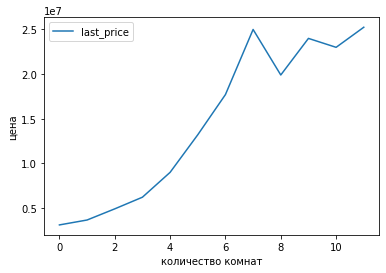

In [79]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(xlabel='количество комнат', ylabel='цена')

По данному графику можно сделать однозначный вывод: чем больше количество комнат, тем выше цена квартиры.

Рассмотрим последний параметр - дата размещения, которая включает день недели, месяц и год.

<AxesSubplot:xlabel='publication_day_week'>

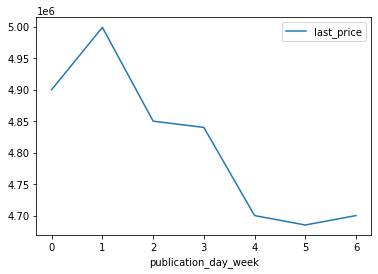

In [80]:
data.pivot_table(index='publication_day_week', values='last_price', aggfunc='median').plot()

По данному графику видна отрицательная зависимость. В выходные дни размещали квартиры с меньшей стоимостью.

Посчитаем коэффициент Пирсона.

In [81]:
data['last_price'].corr(data['publication_day_week'])

-0.020629899979950603

По коэффициенту Пирсона у параметров цены и дня размещения объявления зависимости нет. Связь отсутствует. 

Посмотрим на месяц размещения.

<AxesSubplot:xlabel='publication_month'>

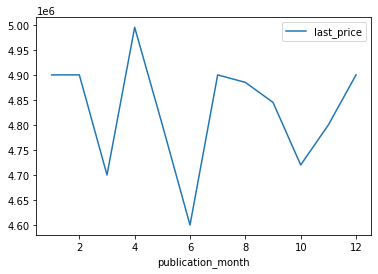

In [82]:
data.pivot_table(index='publication_month', values='last_price', aggfunc='median').plot()

Самые дорогие квартиры размещали в апреле и июле. Самые дешевые в июне и марте.
По данному графику нельзя сделать вывод о зависимости - скорее всего ее тоже нет.
Коэффициент Пирсона также свидетельствует об этом:

In [83]:
data['last_price'].corr(data['publication_month'])

0.0024425581315227563

Посмотрим на год размещения.

<AxesSubplot:xlabel='publication_year'>

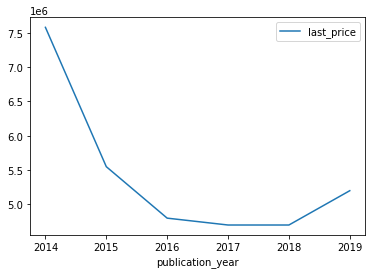

In [84]:
data.pivot_table(index='publication_year', values='last_price', aggfunc='median').plot()

Здесь можно сделать вывод о том, что самые дешевые квартиры продавались с 2015 по 2018 года. С 2014 года наблюдается тенденция к удешевению недвижимости, а в 2018 году наблюдается подъем.

Рассмотри коэффициент Пирсона. По нему также нельзя сказать, что цена зависит от года размещения объявления.

<AxesSubplot:xlabel='publication_year'>

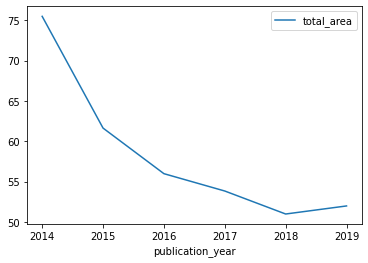

In [85]:
data.pivot_table(index='publication_year', values='total_area', aggfunc='median').plot()

Рассматривая график динамики общей площади продаваемых квартир видна тенденция к снижению. Можно предположить, что снизилась цена квартир именно за счет снижения площади квартир.

In [86]:
data['last_price'].corr(data['publication_year'])

-0.05432509305270193

#### Средняя цена квадратного метра 
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [87]:
data.value_counts('locality_name').head(10)

locality_name
санкт-петербург    9947
всеволожск          271
пушкин              234
мурино              227
шушары              216
колпино             203
кудрово             192
гатчина             149
петергоф            145
парголово           137
dtype: int64

In [88]:
max_ad = ['санкт-петербург', 'всеволожск', 'пушкин', 'мурино', 'шушары', 'колпино', 'кудрово', 'гатчина', 'петергоф', 'парголово']

In [89]:
locality = data.loc[(data['locality_name'] == 'санкт-петербург') 
                    | (data['locality_name'] == 'всеволожск') 
                    | (data['locality_name'] == 'пушкин') 
                    | (data['locality_name'] == 'пушкин')
                    | (data['locality_name'] == 'мурино')
                    | (data['locality_name'] == 'шушары')
                    | (data['locality_name'] == 'колпино')
                    | (data['locality_name'] == 'кудрово')
                    | (data['locality_name'] == 'гатчина')
                    | (data['locality_name'] == 'петергоф')
                    | (data['locality_name'] == 'парголово')
                   ]

# скорее всего, это можно было сделать как-то по-другому, но у меня нет идей

locality.pivot_table(index='locality_name', values = 'meter_price', aggfunc='mean').sort_values(by='meter_price')

,meter_price
locality_name,
всеволожск,67434.629936
гатчина,69992.693801
колпино,75938.525561
шушары,79286.491658
петергоф,85554.144673
мурино,87675.149631
парголово,90901.351145
кудрово,96052.444959
пушкин,103920.487928


Из 10 населенных пунктов с самым большим количеством объявлений, с самыми дорогими квартирами - Санкт-Петербург (111 664 рублей за кв.метр), а с самыми дешевыми - Всеволожск (67 434 рублей за кв.метр)

In [90]:
data.pivot_table(index='locality_name', values = 'meter_price', aggfunc='mean').sort_values(by='meter_price')

,meter_price
locality_name,
вахнова кара,11688.311688
совхозный,12555.555556
ефимовский,12686.567164
фалилеево,13303.769401
житково,15648.286140
...,...
пушкин,103920.487928
репино,104238.614786
бор,105539.261570


Если рассматривать все населенные пункты - с самыми дешевыми квартирами становится Вахнова Кара (11 688 рублей за квадратнвй метр), а с самыми дорогими - Санкт-Петербург. 

#### Средняя цена километра в Санкт-Петербурге
Выделим квартиры в Санкт-Петербурге и посчитаем среднюю цену каждого километра.

In [91]:
mean_price_km_spb = data.loc[data['locality_name'] == 'санкт-петербург']
(mean_price_km_spb['last_price']/mean_price_km_spb['citycenter_km']).mean()

1218113.329584818

Средняя цена километра в Санкт-Петербурге = 1 218 113 рублей.

    Чем ближе к центру города расположен объект, тем он дороже - это известная закономерность. Это объясняется тем, что в центре города сосредоточена городская инфраструктура, торговые центры, офисные здания, развлекательные центры и др. Соответственно, жильцам не придется тратить много времени на перемещение из квартиры до объектов инфраструктуры, тратить на бензин или общественный транспорт. Из центра города гораздо быстрее попасть в удаленные районы города, чем из одного района в другой.

#### Промежуточный вывод
Большинство объявлений было размещено от 100 до 150 дней. Также есть объявления, где продажа занимала менее месяца.
По результатам диаграммы быстрой продажей можно считать объявления, срок размещения которых был менее 100 дней. Долгой продажей можно считать объявления со сроком от 200 дней. Крайне и необычно долгими - со сроком в 800 и более дней.

На цену квартиры влияют такие факторы, как общая площадь и жилая площадь (коэффициенты Пирсона равны 0,84 и 0,719) Менее значительно влияет площадь кухни.
Совершенно не влияет дата размещения объявления.

Из 10 населенных пунктов с самым большим количеством объявлений, с самыми дорогими квартирами - Санкт-Петербург (111 664 рублей за кв.метр), а с самыми дешевыми - Всеволожск (67 434 рублей за кв.метр)

Средняя цена километра в Санкт-Петербурге = 1 218 113 рублей.

### Общий вывод

Для выполнения исследования были предоставлены данные Яндекс.Недвижимости - архив объявлений о продаже квартир в Санкт-Петербурге и области. Основной задачей проекта стала предобработка данных, изучение особенностей и зависимостей для установки параметров для определения рыночной стоимости объектов недвижимости.
  
По каждому объявлению было доступно 2 вида данных: вписанные пользователем и полученные автоматически на основе картографических данных.
      
1. Предобработка данных
      
В ходе предобработки данных было выявлено много пропусков значений в разных столбцах. После чего был проведен анализ, и пропущенные значения (там, где возможно) были заполнены. Некоторые данные удалось восстановить, тем самым не теряя количество строк, а следовательно ценную информацию. Например, пропущенное число балконов было заменено нулями - так как скорее всего продавец при заполнении оставлял поле пустым, если балконов нет. Кроме того, пропущенная площадь кухни была заменена медианным значением площади кухни квартир, с таким же количеством комнат. Также было сделано и для жилой площади.


Далее были изучены и отредактированы названия населенных пунктов, для того, чтобы не было различий. Например, "поселок" и "посёлок". 

Были обработаны выдающиеся значения, например высота потолка = 100 метров.

Однако в таблице по-прежнему есть пропущенные значения, которые не удалось заменить. А их удаление сыграет отрицательную роль в распределении выборки.

Пропуски в столбцах "parks_around3000" и "ponds_around3000" в одинаковом количестве – предположительно, был технический сбой. 
    
2. Новые столбцы
    
Были рассчитаны новые показатели: 
   - цена квадратного метра
   - день недели публикации
   - месяц и год публикации
   - тип этажа квартиры (первый, последний, другой)
   - расстояние до центра города в километрах
   
3. Исследовательский анализ
    
Были изучены следующие параметры: 
 - общая площадь
 - жилая площадь
 - площадь кухни
 - цена объекта
 - количество комнат
 - высота потолков
 - этаж квартиры
 - типа этажа квартиры
 - общее кол-во этажей в доме
 - расстояние до центра города в метрах
 - расстояние до ближайшего аэропорта
 - расстояние до ближайшего парка
 - день и месяц публикации объявления


В основном все графики и гистограммы показывали распределение Пуассона, что говорит о нормальности распределения данных. 

Также было изучено, насколько быстро продавались квартиры. Большинство объявлений было размещено от 100 до 150 дней. Также есть объявления, где продажа занимала менее месяца. По результатам диаграммы быстрой продажей можно считать объявления, срок размещения которых был менее 100 дней. Долгой продажей можно считать объявления со сроком от 200 дней. Крайне и необычно долгими - со сроком в 800 и более дней.

Больше всего на общую стоимость квартиры влияют такие факторы, как общая площадь и жилая площадь (коэффициенты Пирсона равны 0,84 и 0,719) Менее значительно влияет площадь кухни. Совершенно не влияет дата размещения объявления.

Средняя цена квадратного метра в населенных пунктах с наибольшим числом объявлений: с самыми дорогими квартирами - Санкт-Петербург (111 664 рублей за кв.метр), а с самыми дешевыми - Всеволожск (67 434 рублей за кв.метр)

Также была посчитана средняя цена километра в Санкт-Петербурге = 1 218 113 рублей.

Чем ближе к центру города расположен объект, тем он дороже - это известная закономерность. Это объясняется тем, что в центре города сосредоточена городская инфраструктура, торговые центры, офисные здания, развлекательные центры и др. Соответственно, жильцам не придется тратить много времени на перемещение из квартиры до объектов инфраструктуры, тратить на бензин или общественный транспорт. Из центра города гораздо быстрее попасть в удаленные районы города, чем из одного района в другой.
________________________________________________________________________

Так как в данных было большое количество пропусков и аномальных значений - проводить достоверный анализ не представляется возможным. 

